In [40]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [41]:
df = pd.read_csv('mall customers.csv')

In [42]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [43]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [45]:
df.rename(columns={'Age':'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)': 'score'}, inplace=True)

In [46]:
df.head(10)

,CustomerID,Gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [47]:
df = df.drop('CustomerID', axis=1)

In [48]:
df.head()

,Gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


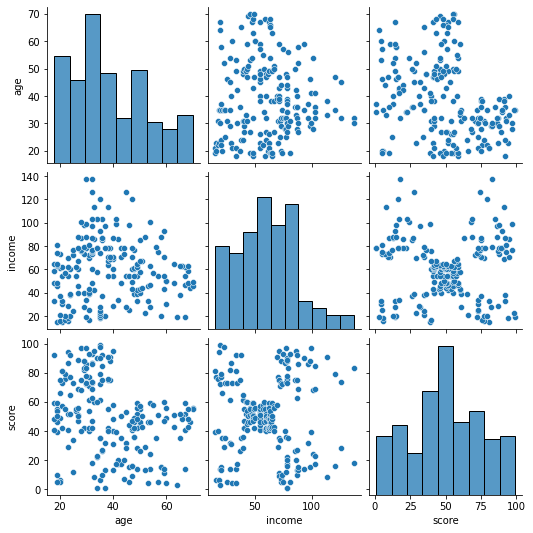

In [49]:
#pairplot
sns.pairplot(df[['age', 'income', 'score']])

# kmeans

In [50]:
import sklearn.cluster as cluster

In [51]:
kmeans = cluster.KMeans() #n_clusters=8

In [53]:
# Fit the K-means model and make predictions
predicted = kmeans.fit_predict(df[['income', 'score', 'age']])

# Display the predicted labels
print(predicted)

[6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6
 5 6 5 3 5 3 0 6 5 3 0 0 0 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 0 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 0 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 0 1 7 1 7 1 7 1 7 1 0 1 7 1 7 1 7 1 7 1 0 1 7 1 7 1
 7 1 7 1 7 1 7 1 7 1 7 1 7 1 7 1 7 1 7 1 7 1 7 1 7 1 7 1 7 1 7 4 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4]


In [54]:
df['predicted'] = predicted
df.head()

,Gender,age,income,score,predicted
0,Male,19,15,39,6
1,Male,21,15,81,5
2,Female,20,16,6,6
3,Female,23,16,77,5
4,Female,31,17,40,6


In [55]:
centers = kmeans.cluster_centers_
centers

array([[ 56.2972973 ,  49.67567568,  27.10810811],
       [ 78.03571429,  81.89285714,  32.78571429],
       [109.7       ,  22.        ,  41.        ],
       [ 53.37777778,  49.08888889,  56.15555556],
       [108.18181818,  82.72727273,  32.45454545],
       [ 25.72727273,  79.36363636,  25.27272727],
       [ 25.14285714,  19.52380952,  44.14285714],
       [ 79.26923077,  15.92307692,  41.23076923]])

# visulization

In [56]:
df0 = df[df.predicted == 0]
df1 = df[df.predicted == 1]
df2 = df[df.predicted == 2]
df3 = df[df.predicted == 3]
df4 = df[df.predicted == 4]
df5 = df[df.predicted == 5]
df6 = df[df.predicted == 6]
df7 = df[df.predicted == 7]

In [57]:
df0.head()

,Gender,age,income,score,predicted
43,Female,31,39,61,0
47,Female,27,40,47,0
48,Female,29,40,42,0
49,Female,31,40,42,0
51,Male,33,42,60,0


In [58]:
df0.shape

(37, 5)

In [59]:
from mpl_toolkits.mplot3d import Axes3D

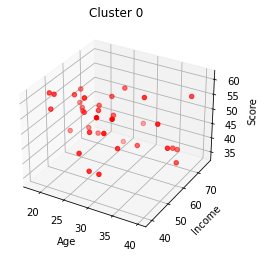

In [60]:
# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting age, income, and score
ax.scatter(df0.age, df0.income, df0.score, c='red', label='cluster_0')

# Adding labels to the plot
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Score')
ax.set_title('Cluster 0')

# Displaying the plot
plt.show()


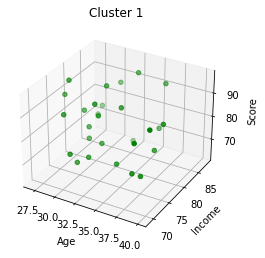

In [61]:
# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting age, income, and score
ax.scatter(df1.age, df1.income, df1.score, c='green', label='cluster_0')

# Adding labels to the plot
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Score')
ax.set_title('Cluster 1')

# Displaying the plot
plt.show()

Text(0.5, 0.92, 'Cluster 0')

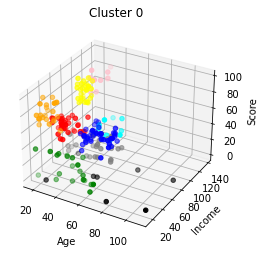

In [62]:

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting age, income, and score
ax.scatter(df0.age, df0.income, df0.score, c='red', label='cluster_0')
ax.scatter(df1.age, df1.income, df1.score, c='yellow', label='cluster_0')
ax.scatter(df2.age, df2.income, df2.score, c='cyan', label='cluster_0')
ax.scatter(df3.age, df3.income, df3.score, c='blue', label='cluster_0')
ax.scatter(df4.age, df4.income, df4.score, c='pink', label='cluster_0')
ax.scatter(df5.age, df5.income, df5.score, c='orange', label='cluster_0')
ax.scatter(df6.age, df6.income, df6.score, c='green', label='cluster_0')
ax.scatter(df7.age, df7.income, df7.score, c='gray', label='cluster_0')

ax.scatter(centers[:,0], centers[:,1], color='black', label='centroids')

# Adding labels to the plot
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Score')
ax.set_title('Cluster 0')

# Elbow Method

In [63]:
wcss = []
clstr = range(1,20)

for k in clstr:
    km = cluster.KMeans(n_clusters=k)
    km.fit(df[['score', 'income','age']])
    wcss.append(km.inertia_) #sum of squared distance

C:\Users\Tipu Sultan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [65]:
#k values
wcss

[308812.77999999997,
 212840.16982097187,
 143342.75157170597,
 104366.15145556198,
 75350.77917248776,
 58300.443321590705,
 51084.505954934364,
 44309.83640371744,
 40567.962964124,
 37093.56470264091,
 35012.985113035116,
 32568.054760054758,
 30225.13428946255,
 27931.594373219377,
 25940.707846539422,
 24907.67911047127,
 23139.374671407026,
 22161.95727795596,
 20970.593022990084]

Text(0.5, 0, 'Num of Clusters')

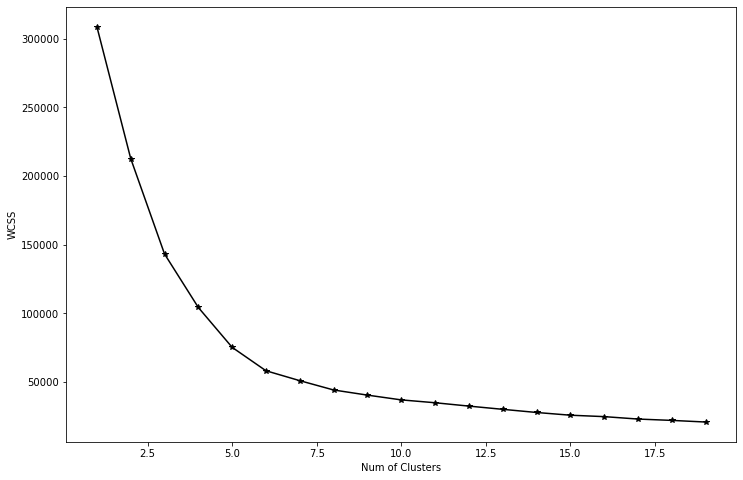

In [66]:
plt.figure(figsize=(12,8))
plt.plot(clstr, wcss, marker='*', color='black')
plt.ylabel('WCSS')
plt.xlabel('Num of Clusters')

In [33]:
!pip install kneed

In [67]:
#plot knee
from kneed import KneeLocator

# Finding the optimal number of clusters using the KneeLocator
kn = KneeLocator(clstr, wcss, curve='convex', direction='decreasing')


In [68]:
kn

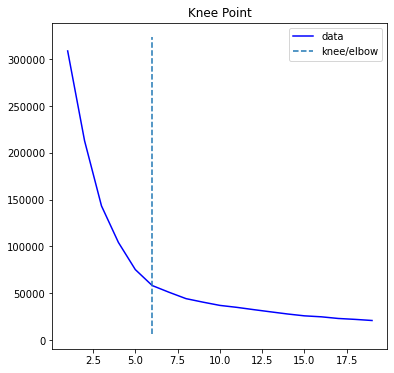

In [69]:
kn.plot_knee()

In [70]:
kn.knee

6

# After Elbow

In [71]:
kmeans2 = cluster.KMeans(n_clusters=5) 
predicted = kmeans2.fit_predict(df[['income','score','age']])
df['predicted'] = predicted
df.head()

,Gender,age,income,score,predicted
0,Male,19,15,39,3
1,Male,21,15,81,0
2,Female,20,16,6,3
3,Female,23,16,77,0
4,Female,31,17,40,3


In [72]:
centers2 = kmeans2.cluster_centers_

Text(0.5, 0.92, 'Cluster 0')

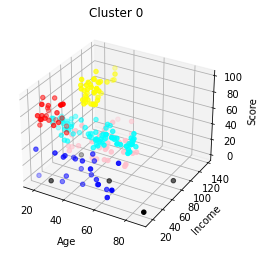

In [73]:
df0 = df[df.predicted == 0]
df1 = df[df.predicted == 1]
df2 = df[df.predicted == 2]
df3 = df[df.predicted == 3]
df4 = df[df.predicted == 4]


# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting age, income, and score
ax.scatter(df0.age, df0.income, df0.score, c='red', label='cluster_0')
ax.scatter(df1.age, df1.income, df1.score, c='yellow', label='cluster_0')
ax.scatter(df2.age, df2.income, df2.score, c='cyan', label='cluster_0')
ax.scatter(df3.age, df3.income, df3.score, c='blue', label='cluster_0')
ax.scatter(df4.age, df4.income, df4.score, c='pink', label='cluster_0')

ax.scatter(centers2[:,0], centers2[:,1], color='black', label='centroids')

# Adding labels to the plot
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Score')
ax.set_title('Cluster 0')
